# Machine learning: House Prices 

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split



### Defining useful functions and loading the data into dataframes

In [2]:
def load_df(path):
     return pd.read_csv(path)




def lr(df,features,target):
    lr = LinearRegression()
    lr.fit(df[features], df[target])
    train_predictions = lr.predict(df[features])
    train_mse = mean_squared_error(train_predictions, df[target])
    train_rmse = np.sqrt(train_mse)
    print(' MSE: ' + str(train_mse) + ' RSME: ' + str(train_rmse))


def rf(df,features,target,trees = 100):
    clf = RandomForestRegressor(n_estimators=trees, random_state=1, max_depth = 5, min_samples_leaf=2)
    clf.fit(df[features],  df[target].values.ravel())
    train_predictions = clf.predict(df[features])
    train_mse = mean_squared_error(train_predictions, df[target])
    train_rmse = np.sqrt(train_mse)
    print(' MSE: ' + str(train_mse) + ' RSME: ' + str(train_rmse))



In [3]:
train = load_df(r'C:\Users\juanv\Desktop\Programming\Projects\Machine learning\Data\House price\train.csv')
test = load_df(r'C:\Users\juanv\Desktop\Programming\Projects\Machine learning\Data\House price\test.csv')

In [4]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


The dataset contains 81 columns. Eliminating the target column (sales price) and ID means that we have 79 features.

Too many features can cause overfitting, which means our prediction model will perform great on the training dataset, but not so much on other data. So we will make sure to investigate and eliminate some features.

## Feature selection

### Exploring feature correlation with Sales Price

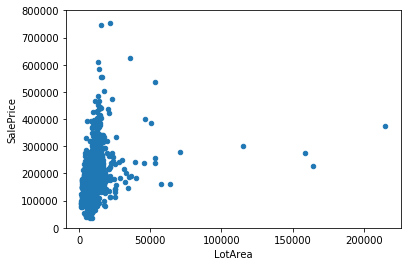

In [5]:
clean_train = train

clean_train.plot.scatter(x='LotArea', y='SalePrice', ylim=(0,800000))

There seems to be no correlation between LotArea and SalePrice, and many values that are outliers, so lets eliminate it:

In [6]:
clean_train = clean_train.drop('LotArea',axis=1)

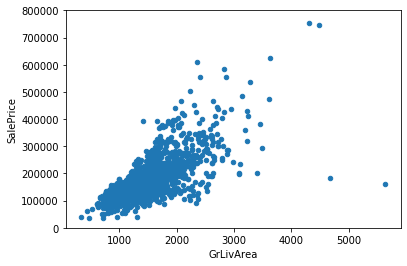

In [7]:
clean_train.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000))

Good correlation between GrLivArea and SalePrice. Lets eliminate just the outliers:

In [8]:
clean_Train = clean_train.drop(clean_train[(clean_train['GrLivArea']>4000) & (clean_train['SalePrice']<300000)].index)

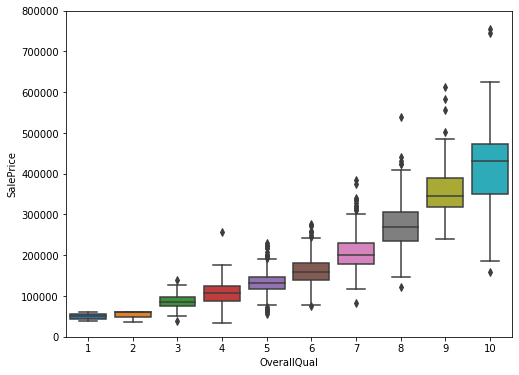

In [9]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=clean_train)
fig.axis(ymin=0, ymax=800000);

Strong linear relationship between overall quality and SalePrice

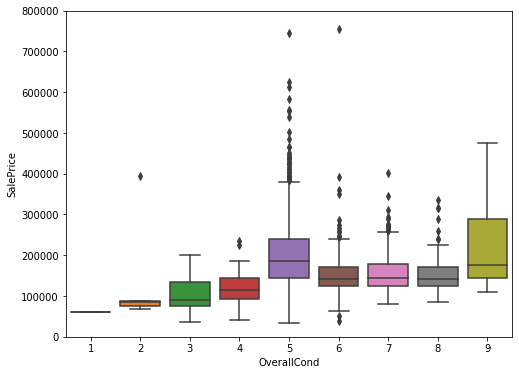

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallCond', y="SalePrice", data=clean_train)
fig.axis(ymin=0, ymax=800000);

Too many outliers, and a very weak linear relationship. Lets eliminate it:

In [11]:
clean_train = clean_train.drop('OverallCond',axis=1)

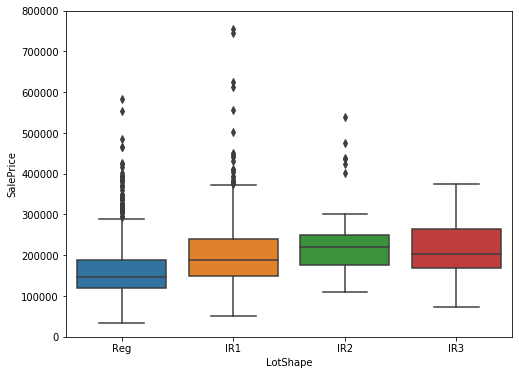

In [12]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='LotShape', y="SalePrice", data=clean_train)
fig.axis(ymin=0, ymax=800000);

The categories of LotShape have similar average SalePrice value, so it wont be useful for our model:

In [13]:
clean_train = clean_train.drop('LotShape',axis=1)

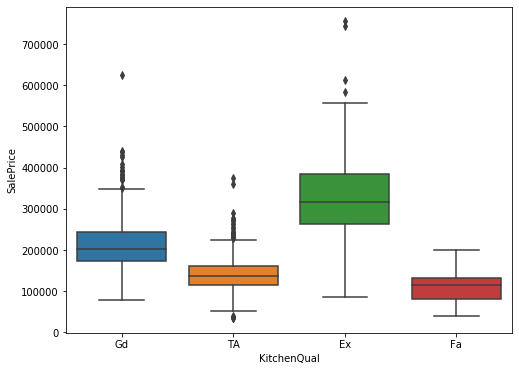

In [14]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='KitchenQual', y="SalePrice", data=clean_train)


Kitchen quality does seem to matter on the sales price, we will keep this feature.

### Correlation Matrix (heatmap)

The heatmap is one of the best ways to find correlation between features:

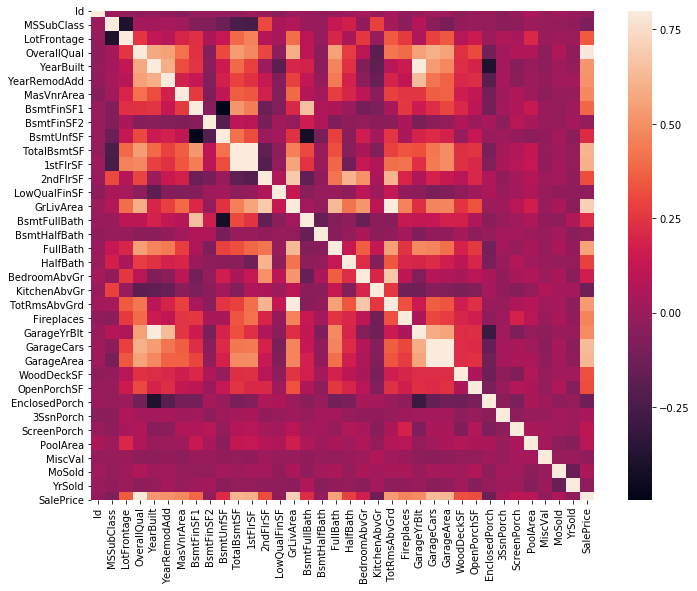

In [15]:
corrmat = clean_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

The strong correlation between some features could indicate a case of [multicollinearity](https://en.wikipedia.org/wiki/Multicollinearity#:~:text=Multicollinearity%20refers%20to%20a%20situation,equal%20to%201%20or%20%E2%88%921.), which is undesirable for our prediction. Reading the data description of this features we can indeed conclude that they give the same information about the house. So lets eliminate them:

In [16]:
clean_train = clean_train.drop('GarageArea',axis=1)
clean_train = clean_train.drop('1stFlrSF',axis=1)
clean_train = clean_train.drop('TotRmsAbvGrd',axis=1)
clean_train = clean_train.drop('GarageYrBlt',axis=1)



Lets check the correlation between SalePrice and the numerical features in numbers:

In [17]:
clean_train.corr().SalePrice.sort_values()

KitchenAbvGr    -0.135907
EnclosedPorch   -0.128578
MSSubClass      -0.084284
YrSold          -0.028923
LowQualFinSF    -0.025606
Id              -0.021917
MiscVal         -0.021190
BsmtHalfBath    -0.016844
BsmtFinSF2      -0.011378
3SsnPorch        0.044584
MoSold           0.046432
PoolArea         0.092404
ScreenPorch      0.111447
BedroomAbvGr     0.168213
BsmtUnfSF        0.214479
BsmtFullBath     0.227122
HalfBath         0.284108
OpenPorchSF      0.315856
2ndFlrSF         0.319334
WoodDeckSF       0.324413
LotFrontage      0.351799
BsmtFinSF1       0.386420
Fireplaces       0.466929
MasVnrArea       0.477493
YearRemodAdd     0.507101
YearBuilt        0.522897
FullBath         0.560664
TotalBsmtSF      0.613581
GarageCars       0.640409
GrLivArea        0.708624
OverallQual      0.790982
SalePrice        1.000000
Name: SalePrice, dtype: float64

The Id column is a simple ramdom column that indicates the house position in the database. This means that any features that have correlation values that are similar to Id correlation value can be considered as unreliable. Lets eliminate all features that have a less than 0.20 correlation value:

In [18]:
low_corr = ['KitchenAbvGr', 'EnclosedPorch', 'MSSubClass','YrSold','LowQualFinSF','MiscVal','BsmtHalfBath','BsmtFinSF2','3SsnPorch','MoSold','PoolArea','ScreenPorch','BedroomAbvGr']

clean_train = clean_train.drop(low_corr,axis=1)

## Missing values

In [19]:
clean_train.isnull().mean().sort_values(ascending=False).head(20)

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageFinish    0.055479
GarageCond      0.055479
GarageQual      0.055479
GarageType      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtQual        0.025342
BsmtCond        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
Exterior1st     0.000000
YearBuilt       0.000000
dtype: float64

None of this features seem important, except MasVnrArea, that ranks pretty high in the correlation list with SalePrice, so we will substitute its missing values with the mean value of the column. We will also do the same with Electrical, as it has very little missing values.

In [20]:
missing = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','GarageQual', 'GarageType', 'GarageFinish', 'GarageCond', 'BsmtExposure', 'BsmtFinType2',  'BsmtFinType1', 'BsmtCond', 'BsmtQual', 'MasVnrType']

clean_train = clean_train.drop(missing,axis=1)

clean_train['Electrical'] = clean_train['Electrical'].fillna(clean_train['Electrical'].mode()[0])
clean_train['MasVnrArea'] = clean_train['MasVnrArea'].fillna(clean_train['MasVnrArea'].mean())

clean_train.isnull().sum().max()

0

## Final steps

Lets create dummies of categorical features so our model can perform better on them:

In [21]:
clean_train = pd.get_dummies(clean_train)

test = pd.get_dummies(test)

Getting a list of the features our model will use to calculate its prediction:

In [22]:
features = clean_train.columns.tolist()

The target value for our model to try to predict:

In [23]:
target = ['SalePrice']

We need to fix the test dataset so it looks similar to the dataset our model will train on. We will also remove both the SalePrice column and the ID column.

In [24]:
new_cols = ['Heating_Floor', 'GarageQual_Ex','Exterior1st_Stone', 'Condition2_RRAn', 'Condition2_RRAe', 'HouseStyle_2.5Fin', 'Electrical_Mix', 'Condition2_RRNn', 'Utilities_NoSeWa', 'RoofMatl_Metal', 'Exterior2nd_Other', 'RoofMatl_Roll', 'RoofMatl_Membran', 'Exterior1st_ImStucc', 'RoofMatl_ClyTile', 'Heating_OthW']

for c in new_cols:
    test[c] = 0
    

features.remove('SalePrice')
features.remove('Id')

for f in features:
    test[f] = test[f].fillna('0')
    
test['GarageQual_Ex'] = 0

## Modelling

We will use both MSE and RSME as our error metrics to compare the random forest method with the linear regression one

In [25]:
rf(clean_train,features,target)

 MSE: 620896564.6158302 RSME: 24917.796142833944


In [26]:
lr(clean_train,features,target)

 MSE: 556689033.7025546 RSME: 23594.25849020381


The lower MSE and RSME of the linear regression method seems to indicate that its performing better on the data. However we must keep in mind that the reason it might be performing better is that it is overfitting to the training data, so it wont generalize as well to other data. To check which one is actually better we will submit both to Kaggle and compare scores.

**Update v.1**:

I will use a gradient boosting method called XGBOOST, which I believe might lead to better results than both linear regression and random forests.

### XGBOOST

Creating a validation/holdout dataset for XGboost. The method uses a validation set to stop iterating once the error stops improving.

In [27]:
train, valid = train_test_split(clean_train, test_size=0.1)

In [28]:
my_model = XGBRegressor(n_estimators=1000,learning_rate=0.05)
my_model.fit(train[features], train[target], 
             early_stopping_rounds=7, 
             eval_set=[(valid[features], valid[target])],
             verbose=False)

from sklearn.metrics import mean_absolute_error

predictions = my_model.predict(valid[features])
print("Mean Squared Error: " + str(mean_squared_error(predictions, valid[target])))
print("Mean Absolute Error: " + str(mean_absolute_error(predictions, valid[target])))

[21:13:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Squared Error: 1008654163.8621296
Mean Absolute Error: 18387.34037885274


Converting the following columns to float type for the xgb prediction:

In [29]:
test[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars']] = test[['MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars']].astype(float) 

In [30]:
xgb_predictions = my_model.predict(test[features])

lr = LinearRegression()
lr.fit(clean_train[features], clean_train[target])
lr_predictions = lr.predict(test[features])

clf = RandomForestRegressor(n_estimators=100, random_state=1, max_depth = 5, min_samples_leaf=2)
clf.fit(clean_train[features], clean_train[target])
rf_predictions = clf.predict(test[features])

C:\Users\juanv\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Sanity check on the predicted values:

In [31]:
xgb_predictions

array([118868.58, 155817.86, 169725.22, ..., 158762.3 , 122504.36,
       237024.06], dtype=float32)

In [32]:
lr_predictions

array([[ 98625.78235628],
       [162686.64399777],
       [182441.73923712],
       ...,
       [169972.17816035],
       [ 97106.69403752],
       [234435.47643877]])

In [33]:
rf_predictions

array([123214.18688737, 149334.24579246, 169678.1075172 , ...,
       149786.38256678, 123049.27896216, 221316.48787754])

All predictions makes sense. Creating a csv file from each prediction to submit to Kaggle:

In [34]:
sub_xgb = pd.DataFrame()
sub_xgb['Id'] = test['Id']
sub_xgb['SalePrice'] = xgb_predictions

sub_xgb.to_csv('sub_xgb.csv',index=False)


sub_lr = pd.DataFrame()
sub_lr['Id'] = test['Id']
sub_lr['SalePrice'] = lr_predictions

sub_lr.to_csv('sub_lr.csv',index=False)



sub_rf = pd.DataFrame()
sub_rf['Id'] = test['Id']
sub_rf['SalePrice'] = rf_predictions

sub_rf.to_csv('sub_rf.csv',index=False)

## Kaggle score

Turns out that the random forest model performed better than the linear regression one, so it confirms the possibility that the latter is overfitting.

Linear regression score 0.20615

Random forest score 0.17806

**Update v.1**:

Extreme Gradient Boosting: 0.14560

Gradient Boosting performed much better than LR and RF.

Best position: 2336

jvmd95 in Kaggle